In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows',500)
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

Train Data

In [4]:
df_train = pd.read_csv('D:/Board Infinity/Project/New york taxi fare data/train.csv' , nrows=1000000, parse_dates = ["pickup_datetime"])

EDA(Exploratory Data Analysis)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
key                  1000000 non-null object
fare_amount          1000000 non-null float64
pickup_datetime      1000000 non-null datetime64[ns, UTC]
pickup_longitude     1000000 non-null float64
pickup_latitude      1000000 non-null float64
dropoff_longitude    999990 non-null float64
dropoff_latitude     999990 non-null float64
passenger_count      1000000 non-null int64
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 61.0+ MB


In [6]:
df_train.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  1000000.000000    1000000.000000   1000000.000000      999990.000000   
mean        11.348079        -72.526640        39.929008         -72.527860   
std          9.822090         12.057937         7.626154          11.324494   
min        -44.900000      -3377.680935     -3116.285383       -3383.296608   
25%          6.000000        -73.992060        40.734965         -73.991385   
50%          8.500000        -73.981792        40.752695         -73.980135   
75%         12.500000        -73.967094        40.767154         -73.963654   
max        500.000000       2522.271325      2621.628430          45.581619   

       dropoff_latitude  passenger_count  
count     999990.000000   1000000.000000  
mean          39.919954         1.684924  
std            8.201418         1.323911  
min        -3114.338567         0.000000  
25%           40.734046         1.000000  
50%           40.753166         1.000000  
75%           40.768129         2.000000  
max         1651.553433       208.000000

In [128]:
df_train.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  hour  distance_miles  fare_per_mile  \
0                1  2009        0    17        0.640487       7.025903   
1                1  2010        1    16        5.250670       3.218637   
2                2  2011        3     0        0.863411       6.601723   
3                1  2012        5     4        1.739386       4.426850   
4                1  2010        1     7        1.242218       4.266560   

   delta_lon  delta_lat   direction  distance_to_center  
0  -0.002701   0.009041  106.633523            8.502079  
1  -0.036780  -0.070701 -117.484306            0.543185  
2   0.008504   0.010708   51.544361            3.482099  
3   0.004437  -0.024949  -79.915791            1.654108  
4  -0.011440  -0.015754 -125.985832            4.225834

In [8]:
df_train.round(6)

key  fare_amount           pickup_datetime  \
0         2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1         2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2        2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3         2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4       2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   
...                               ...          ...                       ...   
999995    2014-09-13 21:44:38.0000001          7.0 2014-09-13 21:44:38+00:00   
999996    2010-09-20 14:50:37.0000002          7.3 2010-09-20 14:50:37+00:00   
999997  2013-04-26 14:03:00.000000118         10.5 2013-04-26 14:03:00+00:00   
999998   2011-07-08 00:29:00.00000099          6.9 2011-07-08 00:29:00+00:00   
999999   2009-12-31 14:30:00.00000021          4.1 2009-12-31 14:30:00+00:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.844311        40.721319         -73.841610   
1             -74.016048        40.711303         -73.979268   
2             -73.982738        40.761270         -73.991242   
3             -73.987130        40.733143         -73.991567   
4             -73.968095        40.768008         -73.956655   
...                  ...              ...                ...   
999995        -73.976676        40.785630         -73.959196   
999996        -73.992103        40.671385         -73.992103   
999997        -73.978423        40.751135         -73.993397   
999998        -73.980317        40.759482         -73.976832   
999999        -74.006635        40.741598         -73.999450   

        dropoff_latitude  passenger_count  
0              40.712278                1  
1              40.782004                1  
2              40.750562                2  
3              40.758092                1  
4              40.783762                1  
...                  ...              ...  
999995         40.775114                1  
999996         40.671385                2  
999997         40.762197                5  
999998         40.743122                1  
999999         40.745702                1  

[1000000 rows x 8 columns]

In [9]:
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

**Data Pre-Processing**


Minimum Fare-Amount is Negative,so we have to remove these observations

In [10]:
df_train = df_train[df_train["fare_amount"] >= 0]

In [11]:
len(df_train)

999962

**Histogram of Fare-Amount**

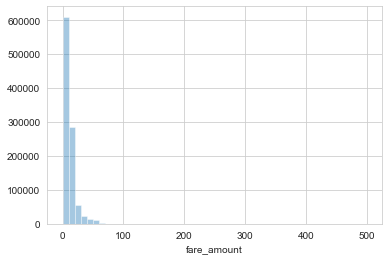

In [12]:
sns.distplot(df_train["fare_amount"],kde=False);

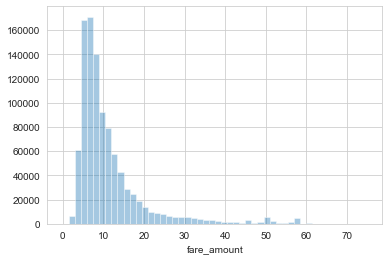

In [13]:
sns.distplot(df_train[df_train["fare_amount"]<75]["fare_amount"],kde=False);

**Removing Missing Data**

In [14]:
print(df_train.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64


In [15]:
df_train = df_train.dropna(how = 'any',axis = 'rows')

In [16]:
len(df_train)

999952

**Test Data**

In [17]:
df_test = pd.read_csv('D:/Board Infinity/Project/New york taxi fare data/test.csv')

In [18]:
df_test.head()

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.763805         -73.981430         40.743835                1  
1        40.719383         -73.998886         40.739201                1  
2        40.751260         -73.979654         40.746139                1  
3        40.767807         -73.990448         40.751635                1  
4        40.789775         -73.988565         40.744427                1

In [19]:
df_test.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count       9914.000000      9914.000000        9914.000000       9914.000000   
mean         -73.974722        40.751041         -73.973657         40.751743   
std            0.042774         0.033541           0.039072          0.035435   
min          -74.252193        40.573143         -74.263242         40.568973   
25%          -73.992501        40.736125         -73.991247         40.735254   
50%          -73.982326        40.753051         -73.980015         40.754065   
75%          -73.968013        40.767113         -73.964059         40.768757   
max          -72.986532        41.709555         -72.990963         41.696683   

       passenger_count  
count      9914.000000  
mean          1.671273  
std           1.278747  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max           6.000000

**New York City Coordinates - https://www.latlong.net/place/new-york-usa-27719.html**

In [20]:
latitude = 40.7141667
longitude = -74.0063889

Here,we will try to define bounding box of interest by using the maximum and minimum coordinates from test.csv


This will help us to make sure to train a model for full pickup/dropoff co-ordinate range for the test set.


Minimum and Maximum Longitude Test set.

In [21]:
print(min(df_test["pickup_longitude"].min(), df_test["dropoff_longitude"].min()))

-74.263242


In [22]:
print(max(df_test["pickup_longitude"].max(), df_test["dropoff_longitude"].max()))

-72.986532


In [23]:
print(min(df_train["pickup_longitude"].min(), df_train["dropoff_longitude"].min()))

-3383.2966079999997


In [24]:
print(max(df_train["pickup_longitude"].max(), df_train["dropoff_longitude"].max()))

2522.271325


Minimum and Maximum Latitude Test Set

In [25]:
print(min(df_test["pickup_latitude"].min(), df_test["dropoff_latitude"].min()))

40.568973


In [26]:
print(max(df_test["pickup_latitude"].max(), df_test["dropoff_latitude"].max()))

41.709555


In [27]:
print(min(df_train["pickup_latitude"].min(), df_train["dropoff_latitude"].min()))

-3116.285383


In [28]:
print(max(df_train["pickup_latitude"].max(), df_train["dropoff_latitude"].max()))

2621.62843


Function for selecting the bounding box.

In [29]:
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

Load Image of NYC Map for Visualization

In [30]:
BB = (-74.3,-73.0,40.6,41.7)

In [31]:
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

In [32]:
df_train = df_train[select_within_boundingbox(df_train,BB)]

In [33]:
print("New size {}".format(len(df_train)))

New size 978061


Function will be used for plotting data on NYC Map

In [34]:
def plot_on_map(df, BB, nyc_map, s = 10, alpha = 0.2):
    fig, axs = plt.subplots(1,2,figsize = (16, 10))
    axs[0].scatter(df["pickup_longitude"], df["pickup_latitude"], alpha = alpha , c = 'r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2],BB[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map,extent = BB)
    
    
    axs[1].scatter(df["dropoff_longitude"], df["dropoff_latitude"], alpha = alpha , c = 'b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2],BB[3]))
    axs[1].set_title('Dropoff Location')
    axs[1].imshow(nyc_map,extent = BB)
    
    

Plotting Training Data on map

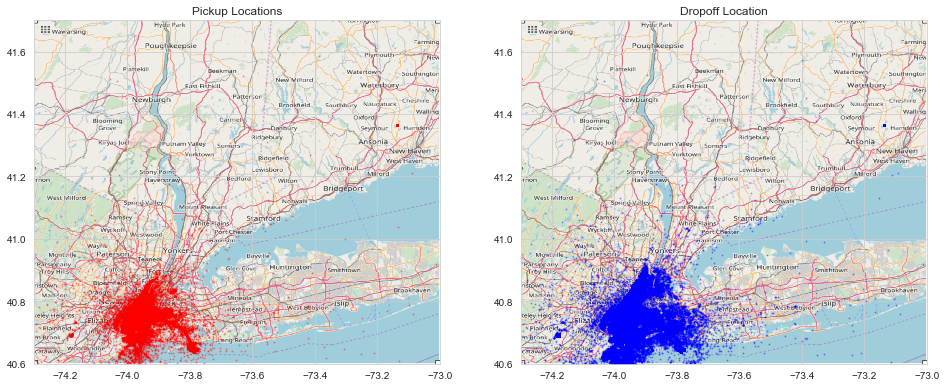

In [35]:
plot_on_map(df_train, BB, nyc_map, s = 1, alpha = 0.3)

Plotting testing Data on Map

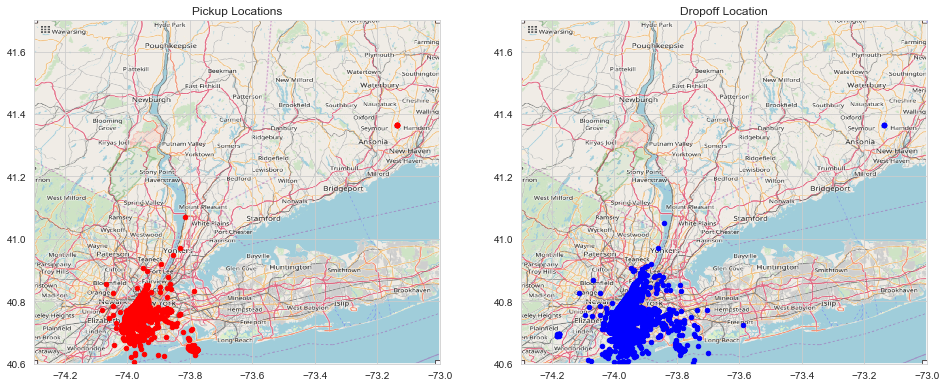

In [36]:
plot_on_map(df_test, BB, nyc_map, alpha = 1.0, s = 20)

**Scatter Plot**

In [37]:
def plot_hires(df, BB, figsize = (12, 12), ax = None, c = ('r','b')):
    if ax == None:
        fig, ax = plt.subplots(1,1, figsize = figsize)
    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c = c[0], s = 0.01, alpha = 0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c = c[1], s = 0.01, alpha = 0.5)

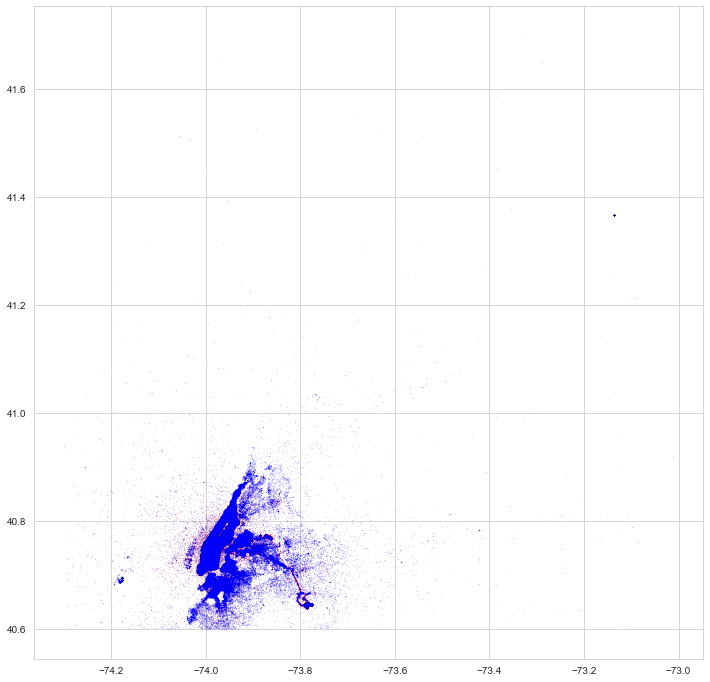

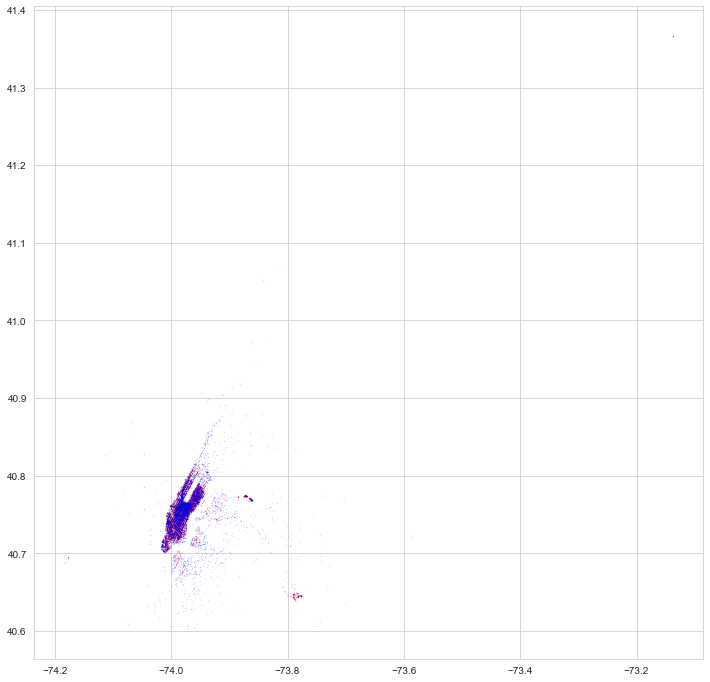

In [38]:
plot_hires(df_train,BB)
plot_hires(df_test,BB)

In [39]:
# Add time information
df_train['year'] = df_train["pickup_datetime"].apply(lambda t:t.year)
df_train['weekday'] = df_train["pickup_datetime"].apply(lambda t:t.weekday())
df_train['hour'] = df_train["pickup_datetime"].apply(lambda t:t.hour)


**Distance and Time Visualization**

1.The longer the distance between pickup and dropoff locations, the higher the fare.

2.Some trips,like to/from an airport are fixed fee.

3.Fare at night is different from the day time.

**Formula to be used for calculating the distance between latitude and longitude.**

In [40]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295  #Pi/180
    a = 0.5 - np.cos((lat2 - lat1)*p)/2 + np.cos(lat1 * p) * np.cos(lat2*p) * (1 - np.cos((lon2-lon1)*p))/2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

**The longer the distance between pickup and dropoff location,higher the fare.Adding new column to dataframe with distance in miles**

In [41]:
df_train["distance_miles"] = distance(df_train["pickup_latitude"], df_train["pickup_longitude"],
                                      df_train["dropoff_latitude"], df_train["dropoff_longitude"])

In [42]:
df_train.head(2)

key  fare_amount           pickup_datetime  \
0  2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1  2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   

   passenger_count  year  weekday  hour  distance_miles  
0                1  2009        0    17        0.640487  
1                1  2010        1    16        5.250670

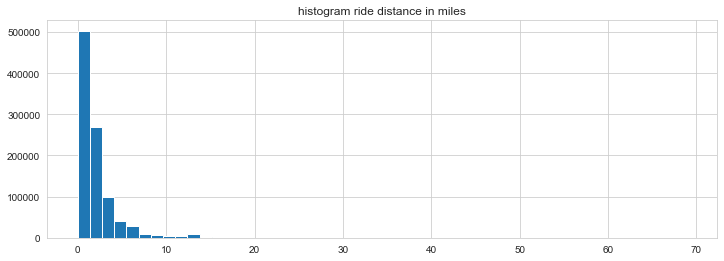

In [43]:
df_train["distance_miles"].hist(bins=50,figsize = (12,4))
plt.title("histogram ride distance in miles");

In [44]:
df_train["distance_miles"].describe()

count    978061.000000
mean          2.061043
std           2.320323
min           0.000000
25%           0.779002
50%           1.336635
75%           2.430157
max          68.868482
Name: distance_miles, dtype: float64

* It seems most rides are just short rides, with a small peak at~13 miles.This peak could be due to airport drives. 

In [45]:
df_train.groupby('passenger_count')['distance_miles','fare_amount'].mean()

distance_miles  fare_amount
passenger_count                             
0                      1.711269     8.707828
1                      2.034222    11.178548
2                      2.168741    11.764392
3                      2.086411    11.469143
4                      2.117401    11.674912
5                      2.059920    11.167977
6                      2.134918    12.243306

**Scatter Plot distance vs Fare**

Text(0.5, 1.0, 'Zoom-in on distance < 15 mile and fare < $100')

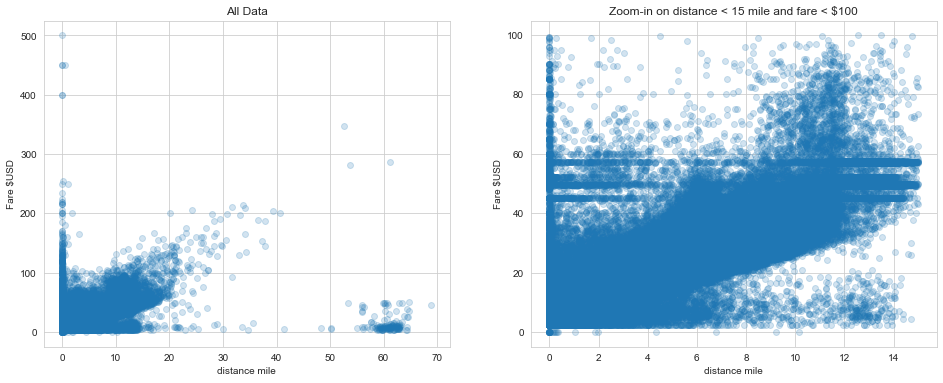

In [46]:
fig, axs = plt.subplots(1, 2, figsize =(16,6))
axs[0].scatter(df_train["distance_miles"],df_train["fare_amount"],alpha = 0.2)
axs[0].set_xlabel("distance mile")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")

# Zoom-in some part of the data.
idx = ((df_train['distance_miles'] < 15) & (df_train["fare_amount"] < 100))
axs[1].scatter(df_train[idx]["distance_miles"],df_train[idx]["fare_amount"],alpha = 0.2)
axs[1].set_xlabel("distance mile")
axs[1].set_ylabel("Fare $USD")
axs[1].set_title("Zoom-in on distance < 15 mile and fare < $100")


**Few Observations-**

1.There are trips with zero distance but with a non-zero fare.could this                     
  be trips from and to the same location? Predicting these dare will be
  difficult as there is likely not sufficient information in the
  dataset.

2.There are some trips with >50 miles travel distance but low fare.
  Perhaps these are discounted trips.

3.The horizontal lines in the right plot might indicate again the fixed 
  fare trips to/from JFK airport.Overall there seems to be a (linear)
  relation between distance and fare with an average rate of +/- 100/20
  = $5/mile.


In [47]:
#remove datapoints with distance <0.05 miles
idx = (df_train["distance_miles"] >= 0.05)
print('Old size: %d' % len(df_train))
df_train = df_train[idx]
print('New size: %d' % len(df_train))

Old size: 978061
New size: 962433


**JFK airport coordinates - https://www.travelmath.com/airport/JFK**

In [48]:
jfk = (-73.7822222222,40.6441666667)
nyc = (-74.0063889,40.7141667)

In [49]:
def plot_location_fare(loc, name, range = 1.5):
    #select all datapoints with dropoff location within range of airport
    fig, axs = plt.subplots(1,2, figsize = (14,5))
    idx = (distance(df_train["pickup_latitude"], df_train["pickup_longitude"],loc[1],loc[0])< range)
    df_train[idx]["fare_amount"].hist(bins = 100,ax = axs[0])
    axs[0].set_xlabel("Fare $USD")
    axs[0].set_title("Histogram pickup location within {} miles of {}".format(range,name))
    
    idx = (distance(df_train["dropoff_latitude"], df_train["dropoff_longitude"],loc[1],loc[0])< range)
    df_train[idx]["fare_amount"].hist(bins = 100,ax = axs[1])
    axs[1].set_xlabel("Fare $USD")
    axs[1].set_title("Histogram dropoff location within {} miles of {}".format(range,name))

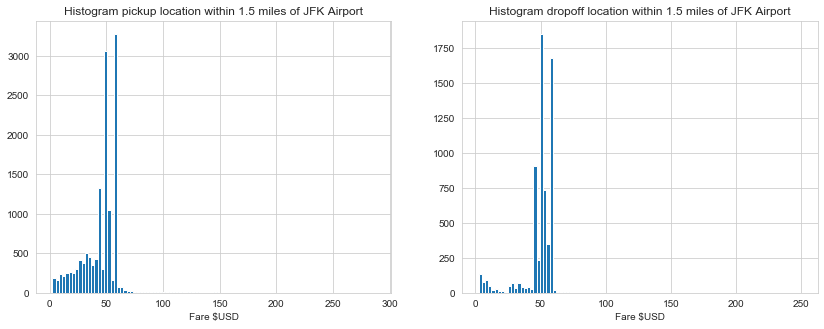

In [50]:
plot_location_fare(jfk,'JFK Airport')

Some other locations to consider for most of the rides.

In [51]:
ewr = (-74.175,40.69) #Newark Liberty International Airport - https://www.travelmath.com/airport/EWR
lga = (-73.87,40.77)  #LaGuardia Airport - https://www.travelmath.com/airport/LGA

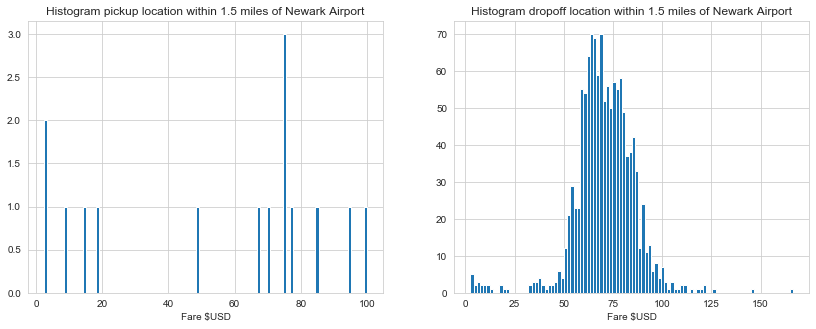

In [52]:
plot_location_fare(ewr,'Newark Airport')

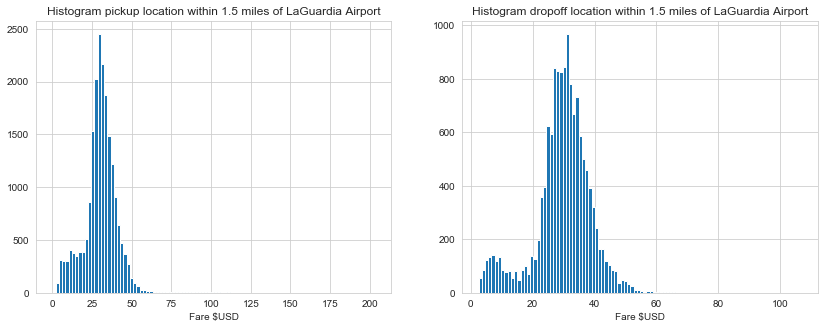

In [53]:
plot_location_fare(lga,'LaGuardia Airport')

Fare at night is different from the day time.

In [54]:
df_train["fare_per_mile"] = df_train["fare_amount"]/df_train["distance_miles"]

In [55]:
df_train["fare_per_mile"].describe()

count    962433.000000
mean          7.421546
std          12.721752
min           0.000000
25%           4.771449
50%           6.135104
75%           8.085859
max        3812.571628
Name: fare_per_mile, dtype: float64

Text(0, 0.5, 'fare per distance in mile')

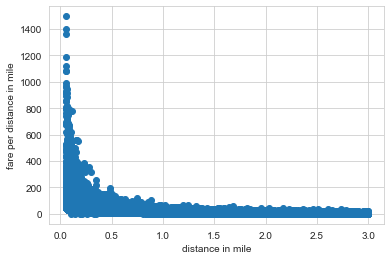

In [56]:
idx = (df_train["distance_miles"]< 3) & (df_train["fare_amount"]<100)
plt.scatter(df_train[idx]["distance_miles"],df_train[idx]["fare_per_mile"])
plt.xlabel("distance in mile")
plt.ylabel("fare per distance in mile")

****Pivot Table****

In [57]:
df_train.pivot_table("fare_per_mile",index = "hour", columns = "year")

year      2009      2010      2011      2012      2013      2014      2015
hour                                                                      
0     6.499397  6.574324  6.046723  6.347752  6.804020  7.001473  7.318776
1     6.336259  6.587778  6.321370  6.383975  7.021929  6.900875  6.974407
2     6.491376  6.819194  5.928391  6.535747  6.835403  6.946912  7.270579
3     6.178696  6.405068  6.064605  6.183963  7.692000  7.047893  6.674571
4     5.941006  6.428828  5.723230  6.291553  6.380988  6.621876  6.671974
5     6.189194  6.067733  6.742914  5.958988  7.963065  6.802803  6.440684
6     5.845517  6.199944  5.705709  6.565798  6.537331  6.713167  6.491548
7     6.562564  6.721096  6.405061  6.848710  7.492602  7.403542  7.850845
8     7.035261  7.418894  7.468816  7.640458  8.417914  8.502368  8.809942
9     7.278168  7.543578  7.647594  7.708457  8.517895  8.597979  8.593047
10    7.291380  7.444602  7.338167  8.055012  8.558028  8.575852  8.874432
11    7.414921  7.494226  7.238782  8.050909  8.683661  8.631433  8.561388
12    7.805850  7.669330  8.141671  7.948765  8.797059  9.001706  8.920133
13    7.545854  7.625559  7.416197  7.721714  8.708989  9.293393  8.883700
14    7.565213  7.603563  7.450513  7.784844  8.685488  8.931433  8.903522
15    7.314500  7.493269  7.230718  7.652271  9.120416  8.694742  8.783262
16    7.373671  7.339379  7.142134  7.306803  8.151143  8.601068  8.430501
17    7.087076  7.161012  7.226114  7.688501  8.226106  8.772463  8.688070
18    7.647091  7.248898  7.034009  7.306104  8.556521  8.564641  8.340938
19    7.376881  7.064368  6.890245  7.293315  7.772822  8.072091  8.070096
20    6.586457  6.778068  6.503484  7.245539  7.264707  7.544221  7.650078
21    6.354569  6.739492  6.360176  6.493616  7.263447  7.302243  7.205405
22    6.614147  6.710350  6.301470  6.400873  7.149676  7.433959  7.255520
23    6.859383  6.627629  6.233484  6.665064  7.031120  6.896945  7.008832

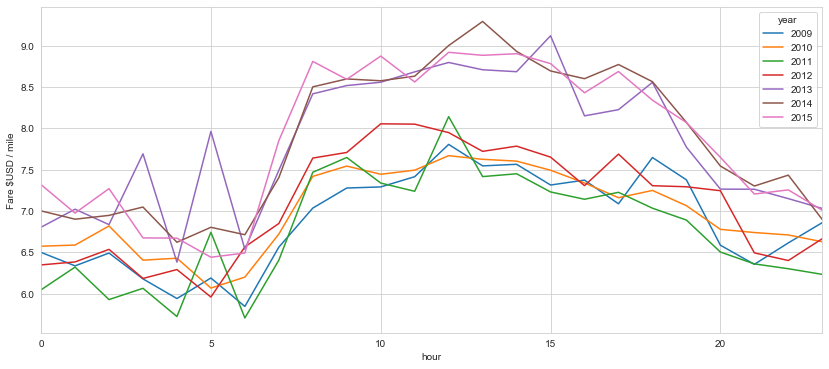

In [58]:
df_train.pivot_table("fare_per_mile",index = "hour", columns = "year").plot(figsize = (14,6))
plt.ylabel("Fare $USD / mile");

Fare and Time Dependency per Year

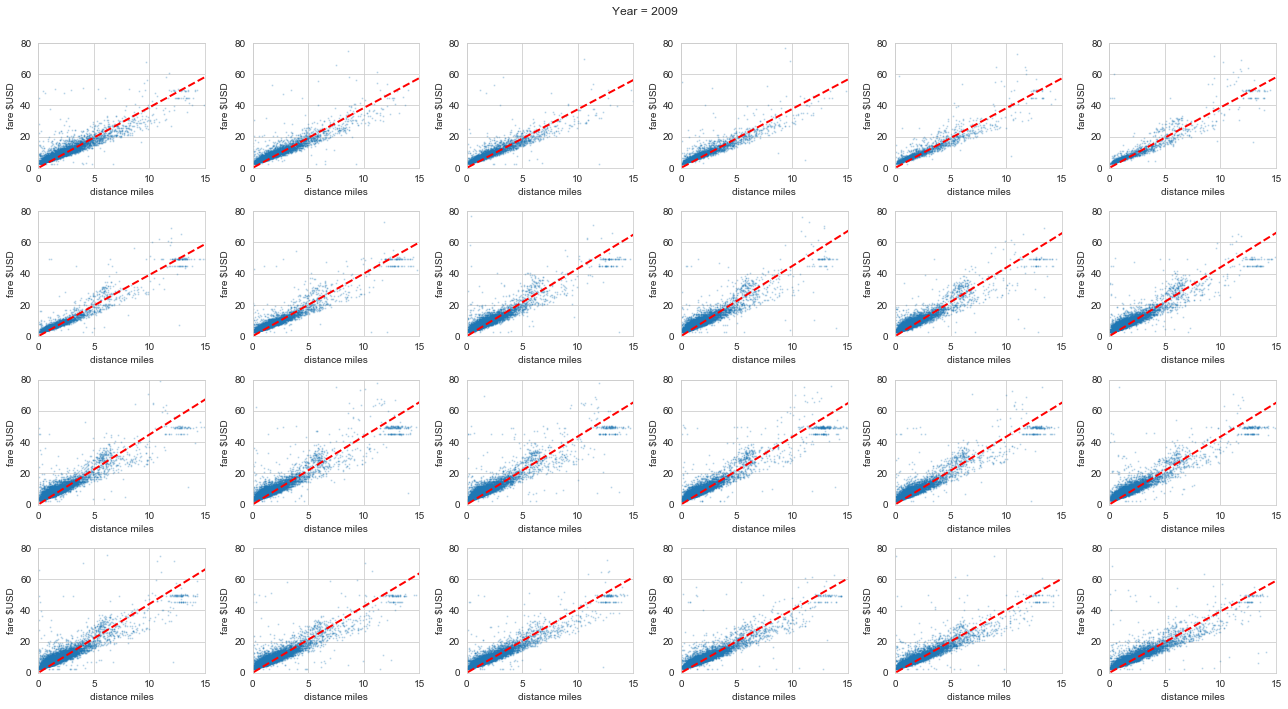

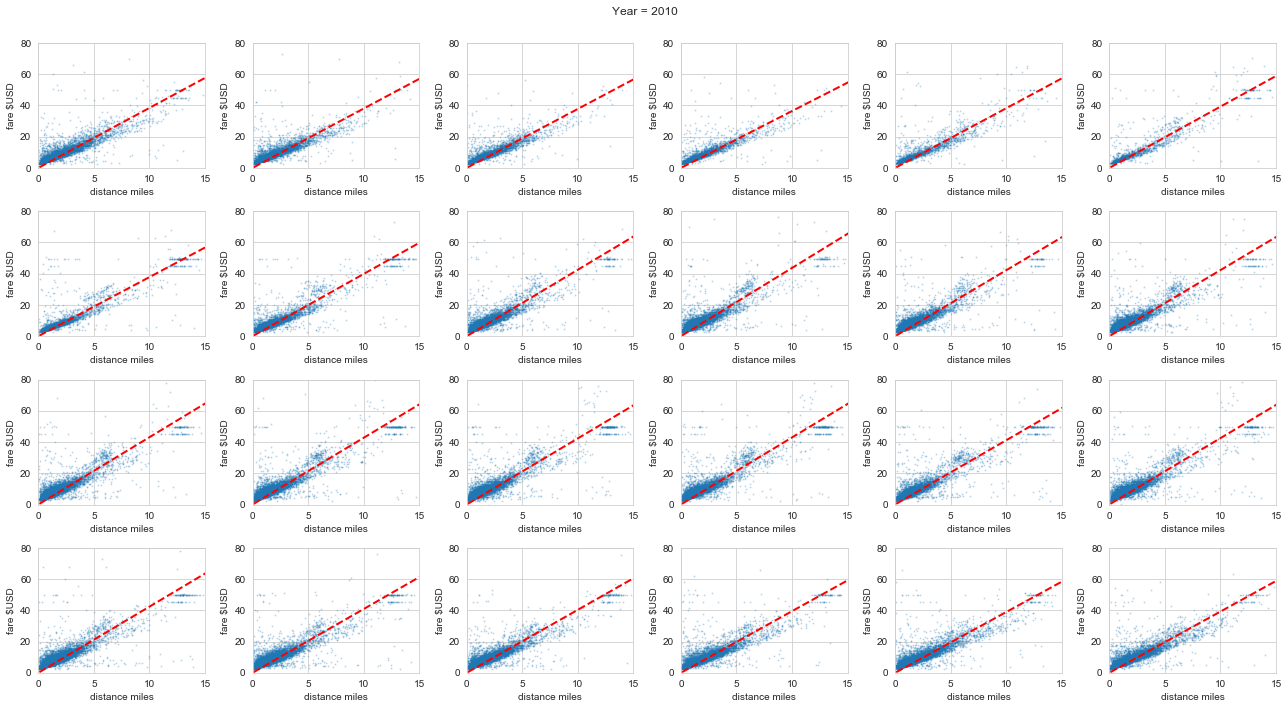

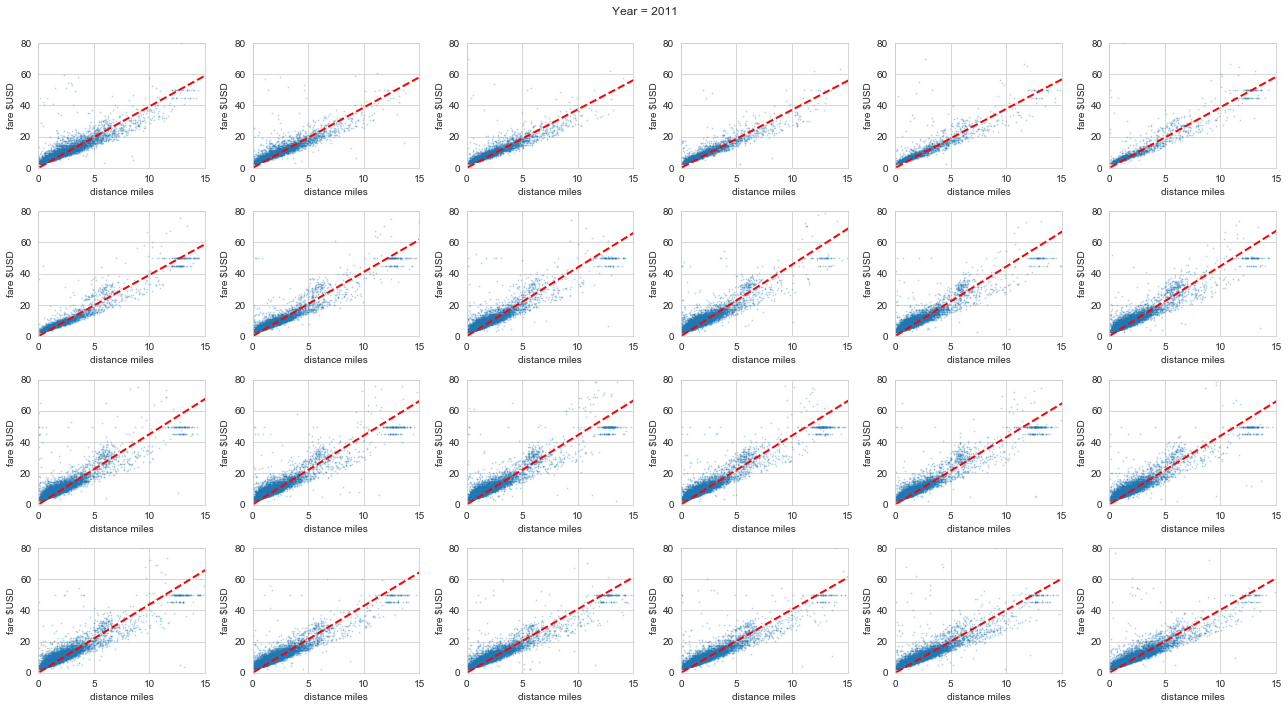

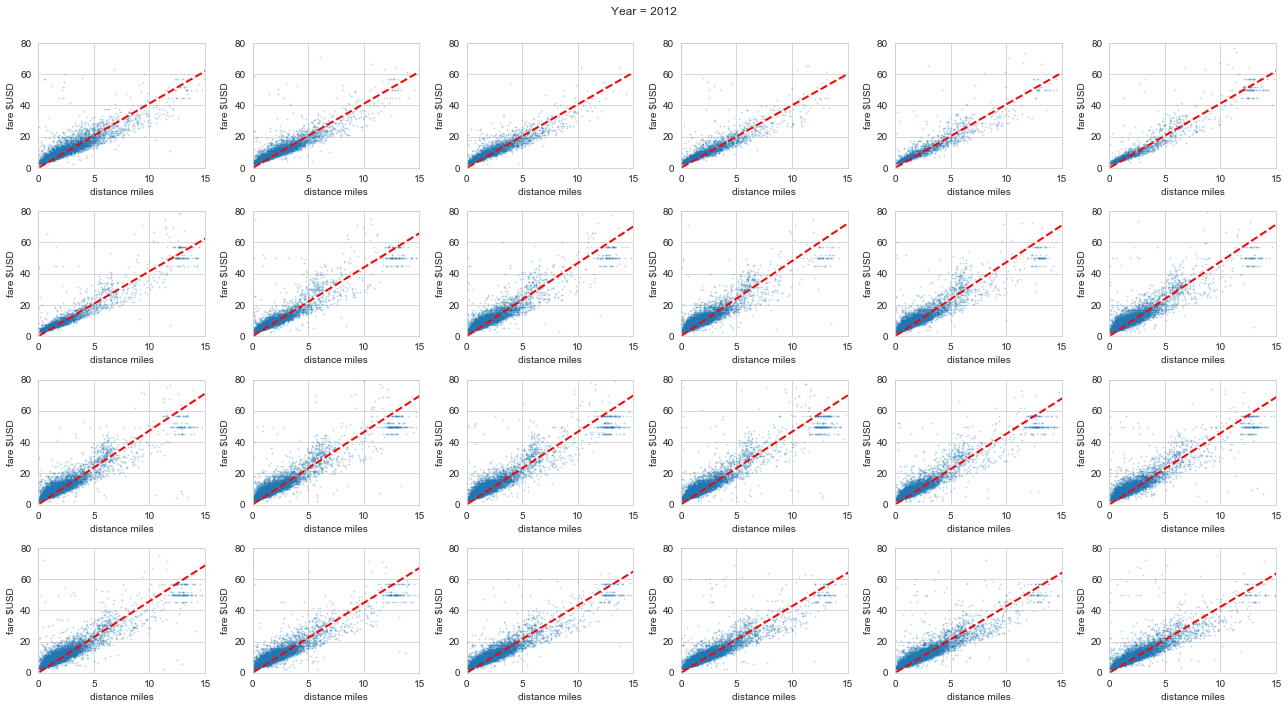

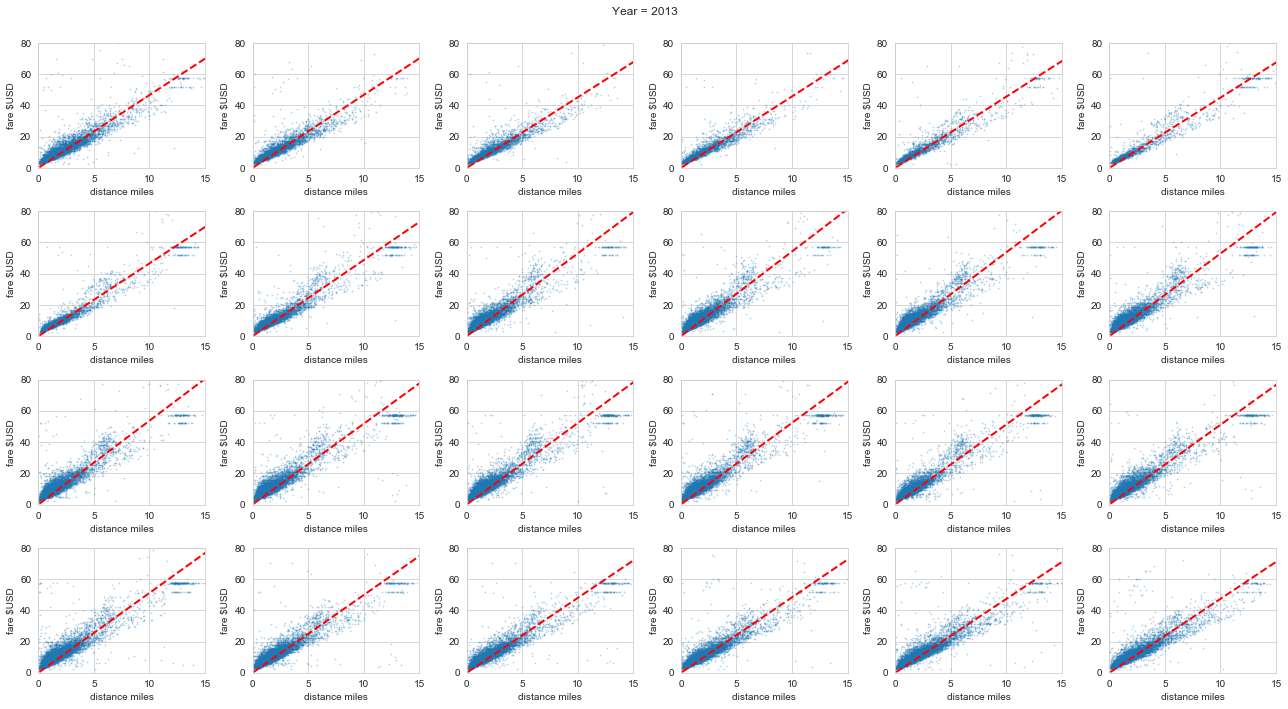

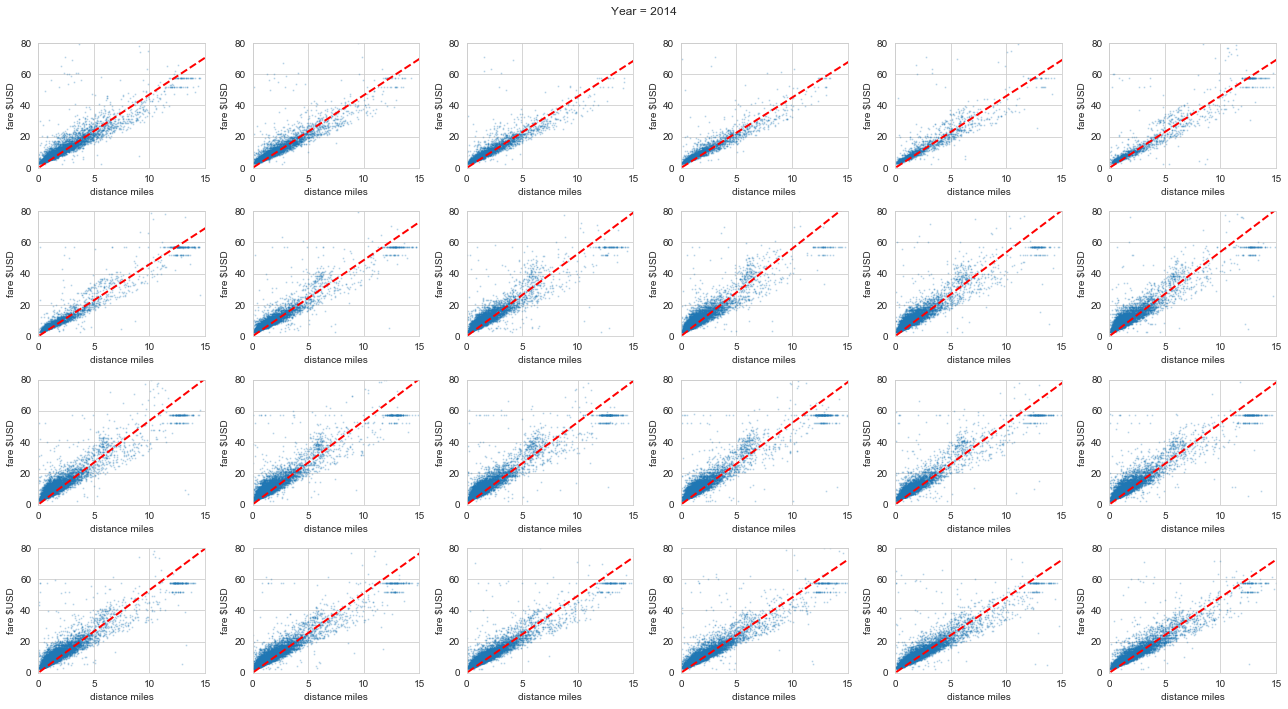

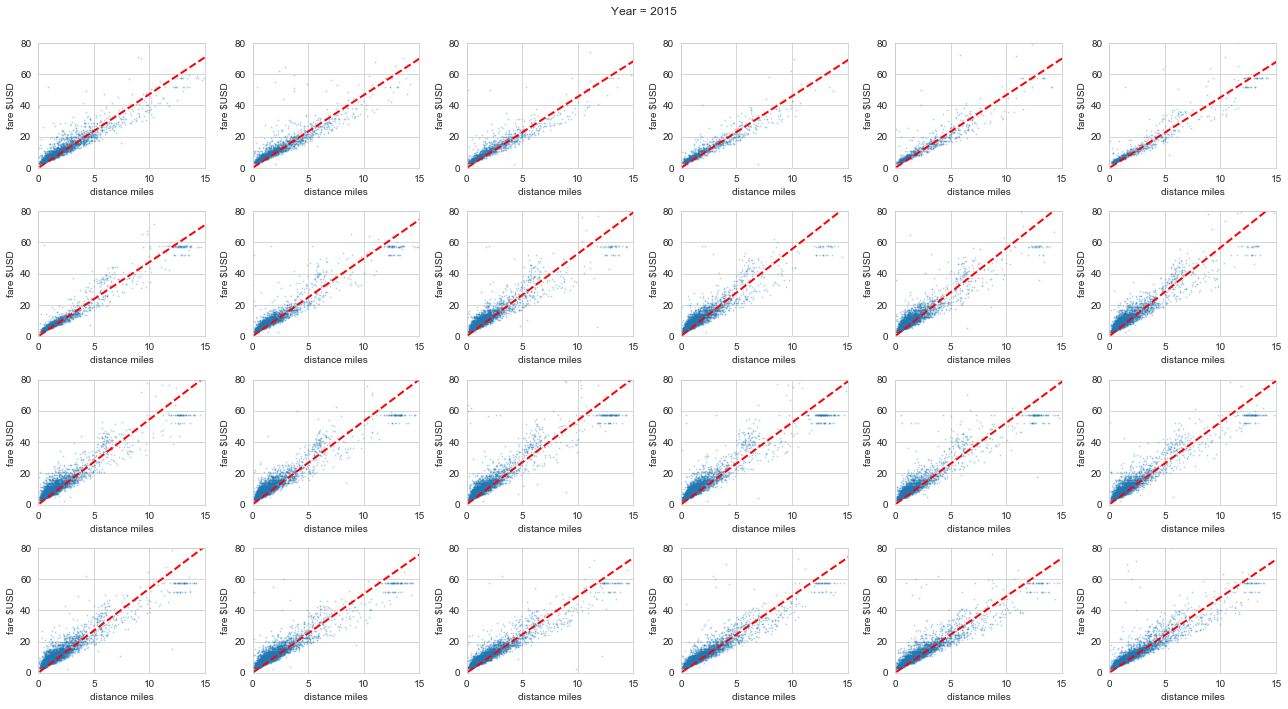

In [126]:
# plot all years
for year in df_train["year"].unique():
    
    # create figure
    fig, axs = plt.subplots(4, 6, figsize=(18, 10))
    axs = axs.ravel()
    
    # plot for all hours
    
    for h in range(24):
        idx = (df_train["distance_miles"] < 15) & (df_train["fare_amount"] < 100) & (df_train["hour"] == h) & \
              (df_train["year"] == year)
        axs[h].scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_amount"], alpha=0.2, s=1)
        axs[h].set_xlabel('distance miles')
        axs[h].set_ylabel('fare $USD')
        axs[h].set_xlim((0, 15))
        axs[h].set_ylim((0, 80))
        
        model = LinearRegression(fit_intercept=False)
        
        X, y = df_train[idx]["distance_miles"].values.reshape(-1,1), df_train[idx]["fare_amount"].values
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.predict(xx.reshape(-1,1)), '--', c='r', lw=2)
        
    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);

**Relevance of direction for calculation of fare amount**

In [60]:
df_train["delta_lon"] = df_train["pickup_longitude"] - df_train["dropoff_longitude"]
df_train["delta_lat"] = df_train["pickup_latitude"] - df_train["dropoff_latitude"]

**Trips in Manhattan**

In [61]:
BB_manhattan = (-74.025,-73.925,40.7,40.8)
idx_manhattan = select_within_boundingbox(df_train,BB_manhattan)

Text(0.5, 1.0, 'log1p(fare_amount)')

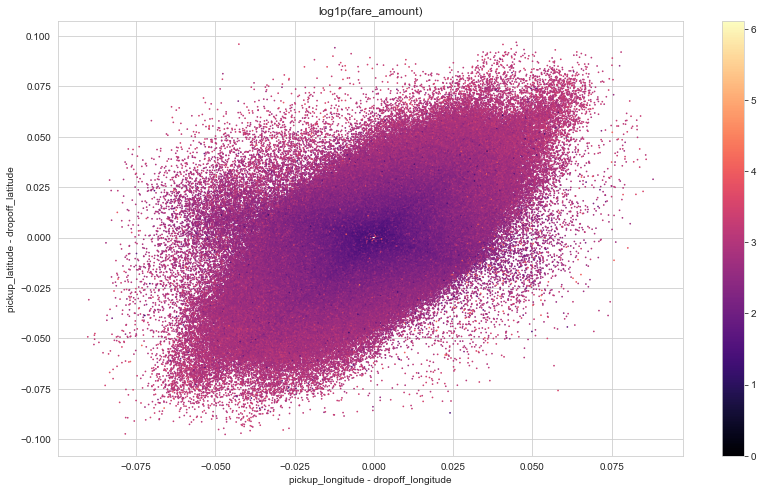

In [62]:
plt.figure(figsize= (14,8))
plt.scatter(df_train[idx_manhattan]["delta_lon"],df_train[idx_manhattan]["delta_lat"],s = 0.5, alpha = 1.0,
           c=np.log1p(df_train[idx_manhattan]["fare_amount"]),
           cmap = "magma")
plt.colorbar()
plt.xlabel('pickup_longitude - dropoff_longitude')
plt.ylabel('pickup_latitude - dropoff_latitude')
plt.title('log1p(fare_amount)')


**The above plot shows that direction seems to matter.Direction of a trip,from 180 to -180 degrees.Horizontal axes = 0 degrees**

In [63]:
def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

In [64]:
df_train['direction'] = calculate_direction(df_train.delta_lon,df_train.delta_lat)

In [129]:
df_train.head(1)

key  fare_amount           pickup_datetime  \
0  2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319          -73.84161         40.712278   

   passenger_count  year  weekday  hour  distance_miles  fare_per_mile  \
0                1  2009        0    17        0.640487       7.025903   

   delta_lon  delta_lat   direction  distance_to_center  
0  -0.002701   0.009041  106.633523            8.502079

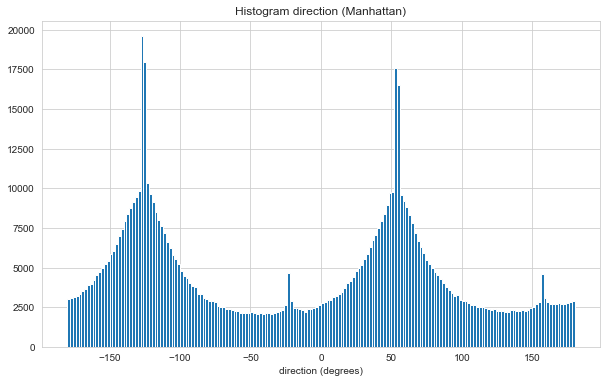

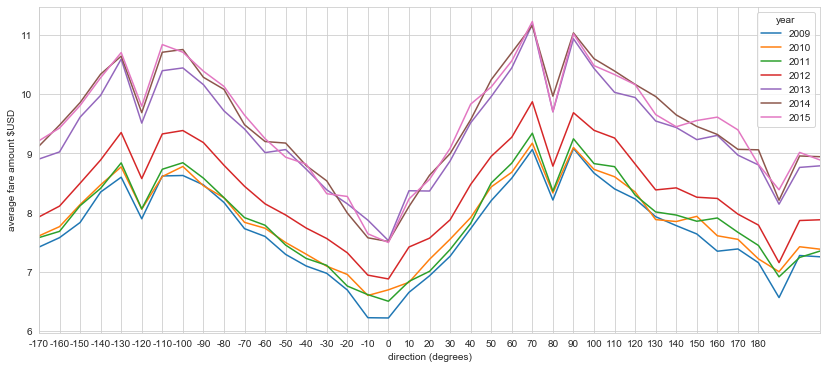

In [66]:
# plot histogram of directions
plt.figure(figsize=(10,6))
df_train[idx_manhattan].direction.hist(bins=180)
plt.xlabel('direction (degrees)')
plt.title('Histogram direction (Manhattan)')

# plot direction vs average fare amount
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(df_train[idx_manhattan]['direction'], np.linspace(-180, 180, 40))

df_train[idx_manhattan].pivot_table('fare_amount', index=[direc], columns='year', aggfunc='mean').plot(ax=ax)

plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

**Fare varies with pickup location**

In [67]:
# Add a new column to df_train with distance in mile
df_train['distance_to_center'] = distance(nyc[1],nyc[0],df_train["pickup_latitude"], df_train["pickup_longitude"])

In [68]:
df_train.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  hour  distance_miles  fare_per_mile  \
0                1  2009        0    17        0.640487       7.025903   
1                1  2010        1    16        5.250670       3.218637   
2                2  2011        3     0        0.863411       6.601723   
3                1  2012        5     4        1.739386       4.426850   
4                1  2010        1     7        1.242218       4.266560   

   delta_lon  delta_lat   direction  distance_to_center  
0  -0.002701   0.009041  106.633523            8.502079  
1  -0.036780  -0.070701 -117.484306            0.543185  
2   0.008504   0.010708   51.544361            3.482099  
3   0.004437  -0.024949  -79.915791            1.654108  
4  -0.011440  -0.015754 -125.985832            4.225834

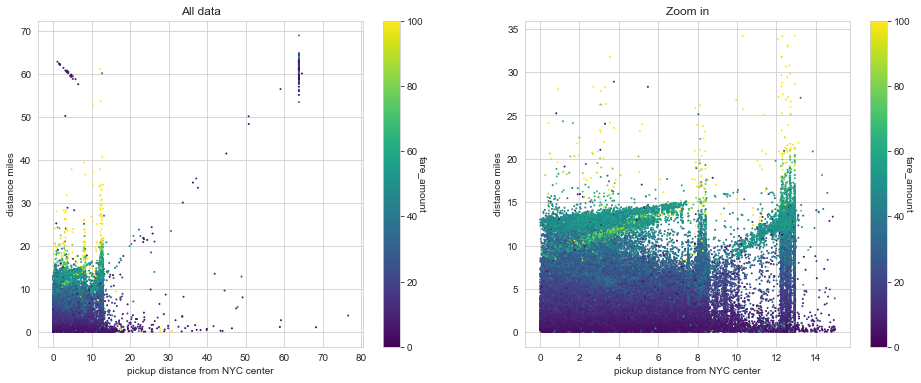

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train["distance_to_center"], df_train["distance_miles"], c=np.clip(df_train["fare_amount"], 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)

axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')

cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

#zoom-in plot
idx = (df_train["distance_to_center"] < 15) & (df_train["distance_miles"] < 35)
im = axs[1].scatter(df_train[idx]["distance_to_center"], df_train[idx]["distance_miles"], 
                     c=np.clip(df_train[idx]["fare_amount"], 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

A lot of 'green' dots,which is about 50 to 60 fare amount near 13 miles distance of NYC centre of distance of trip.This could be due to trips from/to JFK airport.

**Baseline Model and Submission.**

In [70]:
# add new column to dataframe with distance in km
df_test['distance_miles'] = distance(df_test["pickup_latitude"], df_test["pickup_longitude"], 
                                     df_test["dropoff_latitude"], df_test["dropoff_longitude"])
df_test['distance_to_center'] = distance(nyc[1], nyc[0], df_test["dropoff_latitude"], df_test["dropoff_longitude"])
df_test['hour'] = df_test["pickup_datetime"].apply(lambda t: pd.to_datetime(t).hour)
df_test['year'] = df_test["pickup_datetime"].apply(lambda t: pd.to_datetime(t).year)
df_test['weekday'] = df_test["pickup_datetime"].apply(lambda t: pd.to_datetime(t).weekday())

In [71]:
df_train.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  year  weekday  hour  distance_miles  fare_per_mile  \
0                1  2009        0    17        0.640487       7.025903   
1                1  2010        1    16        5.250670       3.218637   
2                2  2011        3     0        0.863411       6.601723   
3                1  2012        5     4        1.739386       4.426850   
4                1  2010        1     7        1.242218       4.266560   

   delta_lon  delta_lat   direction  distance_to_center  
0  -0.002701   0.009041  106.633523            8.502079  
1  -0.036780  -0.070701 -117.484306            0.543185  
2   0.008504   0.010708   51.544361            3.482099  
3   0.004437  -0.024949  -79.915791            1.654108  
4  -0.011440  -0.015754 -125.985832            4.225834

In [72]:
len(df_train)

962433

In [73]:
df_test.head()

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.763805         -73.981430         40.743835                1   
1        40.719383         -73.998886         40.739201                1   
2        40.751260         -73.979654         40.746139                1   
3        40.767807         -73.990448         40.751635                1   
4        40.789775         -73.988565         40.744427                1   

   distance_miles  distance_to_center  hour  year  weekday  
0        1.443607            2.431036    13  2015        1  
1        1.507044            1.773728    13  2015        1  
2        0.384398            2.615229    11  2011        5  
3        1.218529            2.720018    21  2012        5  
4        3.347514            2.289611    21  2012        5

In [109]:
# define dataset
# select points 15 miles near NYC center and remove zero passenger datapoints
idx = (df_train["distance_to_center"] < 15) & (df_train["passenger_count"] != 0)

features = ['year', 'hour', 'distance_miles', 'passenger_count','weekday','distance_to_center','direction']

X = df_train[idx][features].values
y = df_train[idx]['fare_amount'].values

In [110]:
print(X.shape,y.shape)

(958629, 7) (958629,)


In [111]:
# define some handy analysis support function
def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [121]:
# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

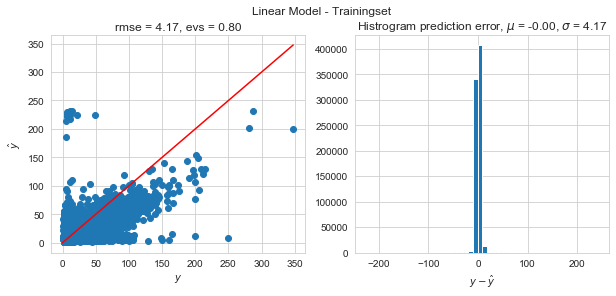

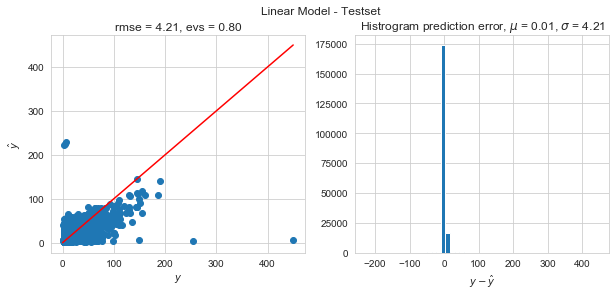

In [122]:
model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))

model_lin.fit(X_train, y_train)


y_train_pred = model_lin.predict(X_train)

plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')


In [123]:
sklearn.metrics.r2_score(y_test, y_test_pred)

0.7991367652412371